## Résumé de la fiche de code

Modélisation d'un mouvement migratoire sur des pays et des individus (migrants) fictifs à l'aide des critères suivants:

##### Niveau  de vie du  pays (modélisé par un flottant variant entre 0 et 1, 1 est non inclu)
##### Stabilité politique du pays (modélisé par un flottant variant entre 0 et 1, 1 est non inclu)

Les critères sont les différents facteurs qui peuvent pousser à la migration.
Chaque individus a un poids/préférence pour chaque critère qui est modélisé par un flottant variant entre 0 et 1, 1 est non inclu.

In [1]:
import random
random.seed(0)
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

plt.style.use('seaborn-muted')


In [20]:
# La fonction initialisation crée les données utilisées pour la simulation (pays, individus) ainsi que des historiques

def initialisation(nb_pays, nb_individus, nb_annees):
    pays =      {i:[random.random(), random.random(), 100] for i in range(nb_pays)}
    individus = {i:[random.random(), random.random(), -1] for i in range(nb_individus)}

    historique_pays =      {i:[] for i in range(nb_pays)}
    historique_individus = {i:[] for i in range(nb_individus)}

    return pays, individus, historique_pays, historique_individus

# La fonction repartition_annuelle simule un mouvement migratoire sur 1 an des individus de la liste individus vers les pays de la liste pays. Elle utilise la formule "somme des (poids du critère i)*(note du critère i) pour 1 <= i <= n", avec n le nombre de critères utilisés.

def repartition_annuelle(pays, individus):
    for k1 in individus.keys():
        acc = 0.0
        p = individus[k1][2]
        
        for k2 in pays.keys():
            n = individus[k1][0]*pays[k2][0] + individus[k1][1]*pays[k2][1]
            
            if n > acc and pays[k2][2] > 0:
                acc = n
                p = k2
        individus[k1][2] = p
        pays[p][2] = pays[p][2] - 1
        
# La fonction changement_pays effectue les changements possibles que peut subir un pays d'une année a une autre.

def changement_pays(pays):
    for k in pays.keys():
        pays[k][2] = 100;
        f = random.random()
        if f < 0.5:
            pays[k][0] = pays[k][0]*0.75 + 0.25*random.random()
            pays[k][1] = pays[k][1]*0.75 + 0.25*random.random()
            
# La fonction changement_individus effectue les changements possibles que peut subir un individu d'une année a une autre.

def changement_individus(individus):
    for k in individus.keys():
        f = random.random()
        if f < 0.5:
            individus[k][0] = individus[k][0]*0.75 + 0.25*random.random()
            individus[k][1] = individus[k][1]*0.75 + 0.25*random.random()
            
# Historique_pays -> Pays : [Niveau de vie pays, Stabilité politique, nombre d'habitants]   
# Historique_individus -> Individu : [Pays de séjour la première année, pays de séjour la deuxième année, ...] 
            
def mise_a_jour_historique(pays, individus, historique_pays, historique_individus):
    for k1 in historique_pays.keys():
        historique_pays[k1].append([pays[k1][0], pays[k1][1], 100-pays[k1][2]])
        
    for k2 in historique_individus.keys():
        historique_individus[k2].append(individus[k2][2])

# La fonction migration simule un mouvement migratoire sur plusieurs années.

def migration(data, nb_annees):
    for i in range(nb_annees):
        print("Année #", i+1)
        plt.figure()
        repartition_annuelle(data[0], data[1])
        mise_a_jour_historique(data[0], data[1], data[2], data[3])
        plt.hist([data[1][k][2] for k in data[1].keys()], bins = [i for i in range(len(data[0]) + 1)])
        plt.show()
        changement_pays(data[0])
        changement_individus(data[1])
    

In [3]:
nb_pays = 5
nb_individus = 250
nb_annees = 50

data = initialisation(nb_pays, nb_individus, nb_annees)

Année # 1


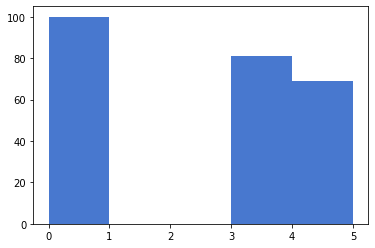

Année # 2


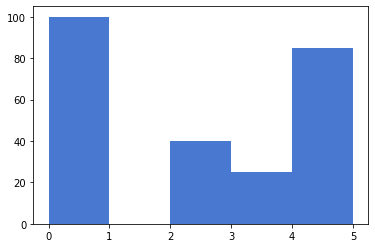

Année # 3


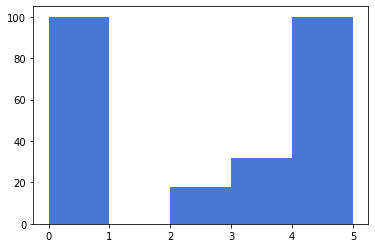

Année # 4


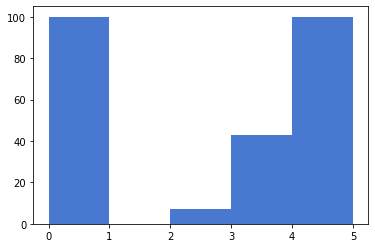

Année # 5


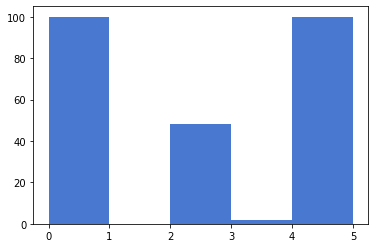

Année # 6


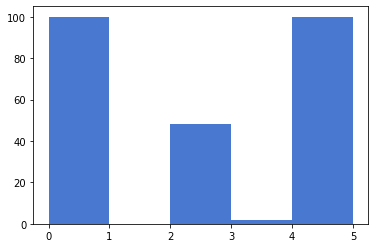

Année # 7


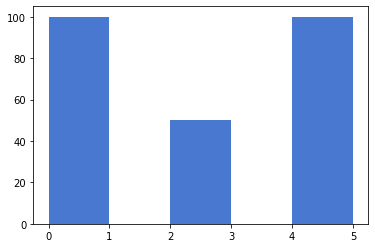

Année # 8


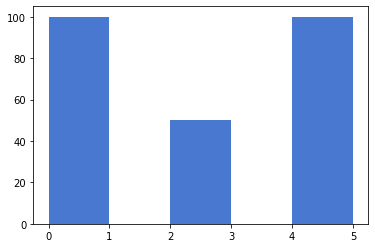

Année # 9


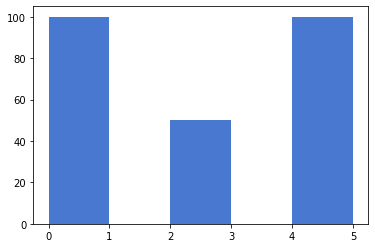

Année # 10


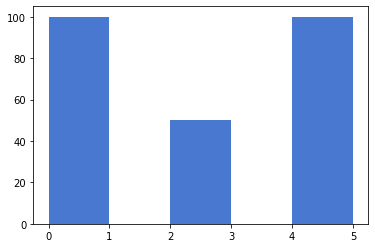

Année # 11


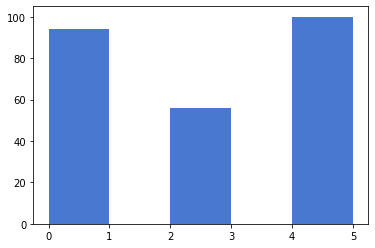

Année # 12


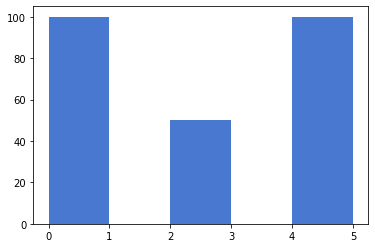

Année # 13


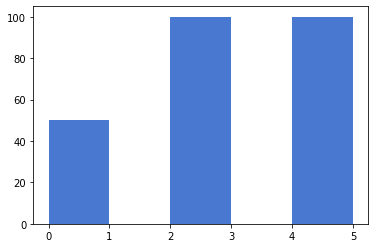

Année # 14


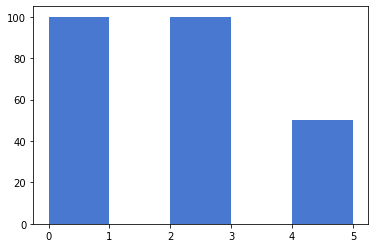

Année # 15


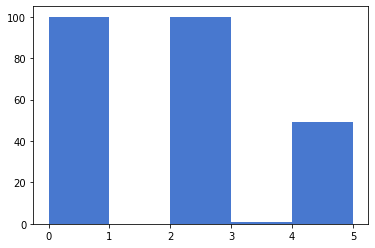

Année # 16


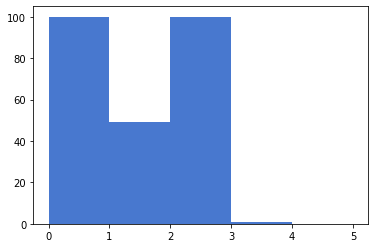

Année # 17


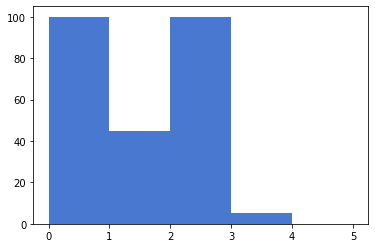

Année # 18


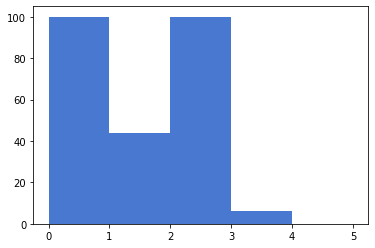

Année # 19


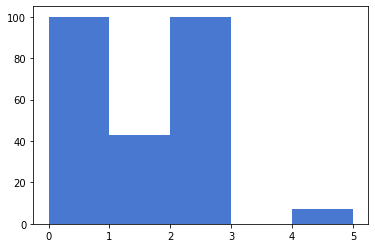

Année # 20


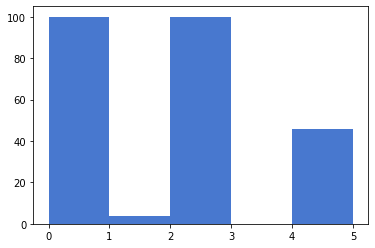

Année # 21


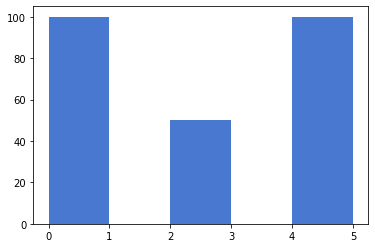

Année # 22


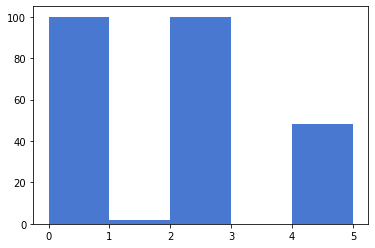

Année # 23


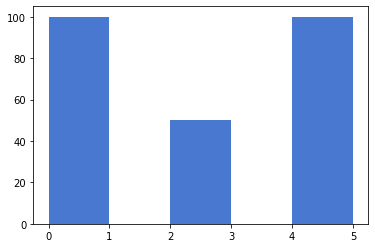

Année # 24


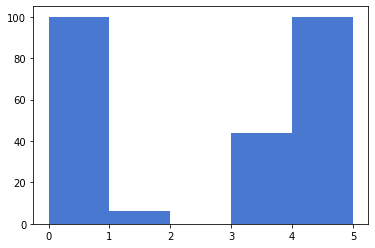

Année # 25


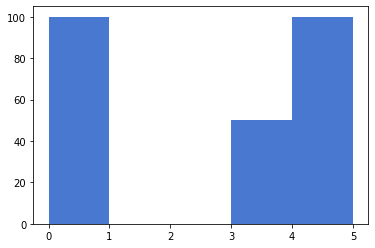

Année # 26


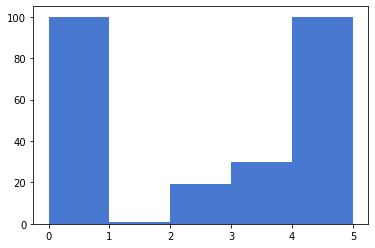

Année # 27


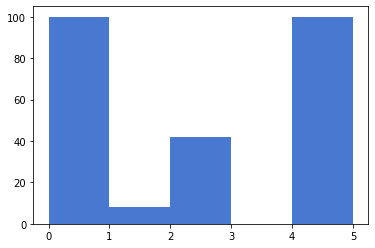

Année # 28


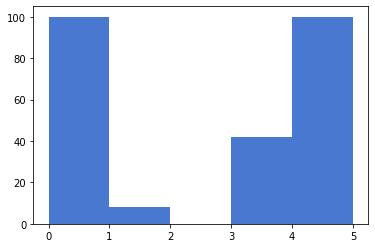

Année # 29


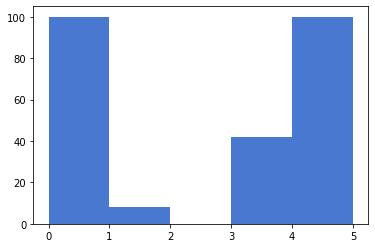

Année # 30


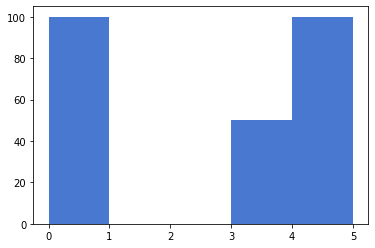

Année # 31


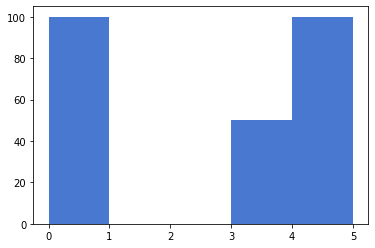

Année # 32


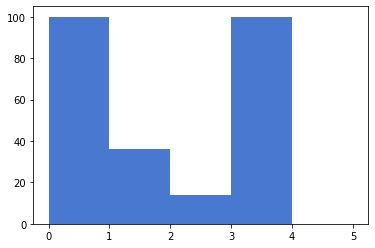

Année # 33


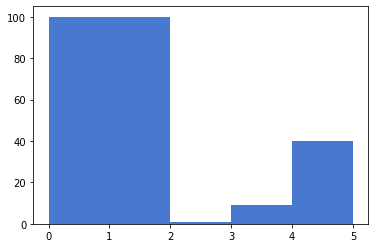

Année # 34


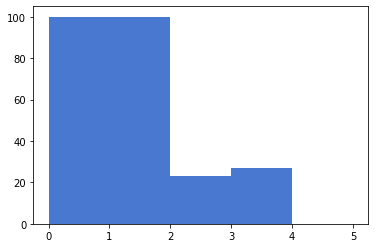

Année # 35


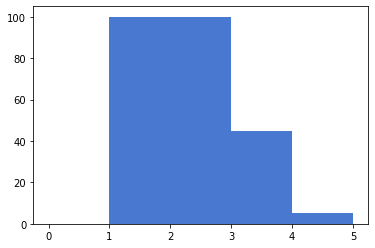

Année # 36


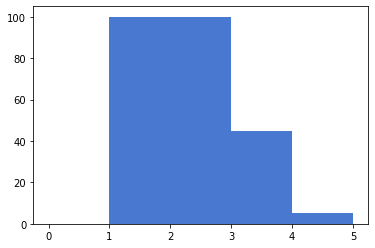

Année # 37


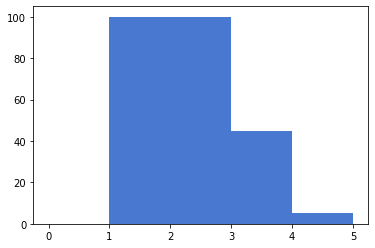

Année # 38


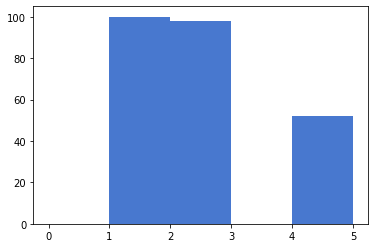

Année # 39


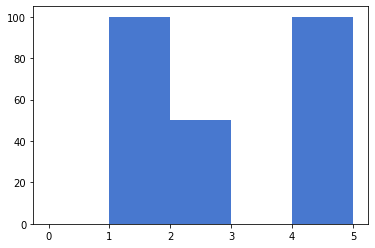

Année # 40


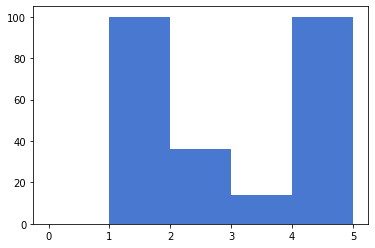

Année # 41


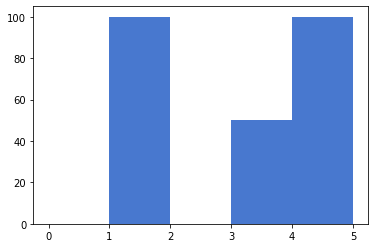

Année # 42


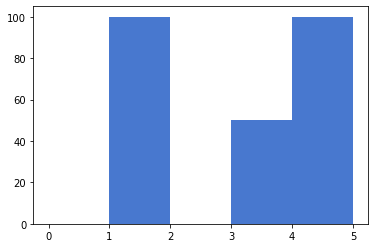

Année # 43


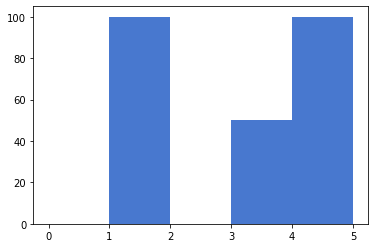

Année # 44


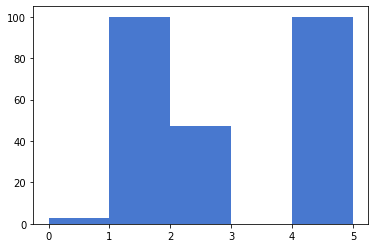

Année # 45


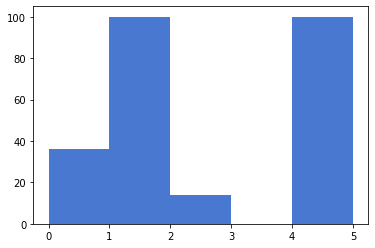

Année # 46


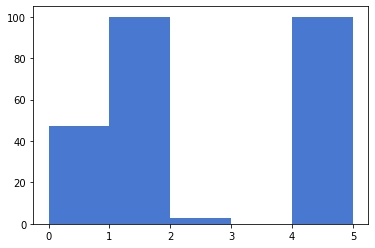

Année # 47


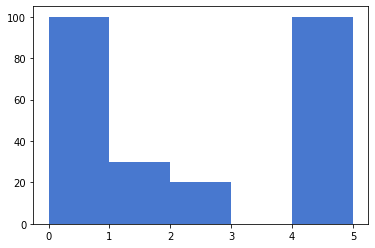

Année # 48


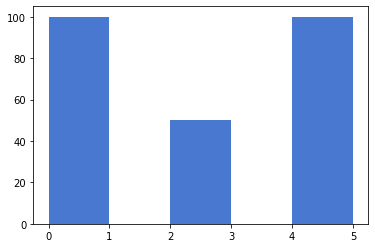

Année # 49


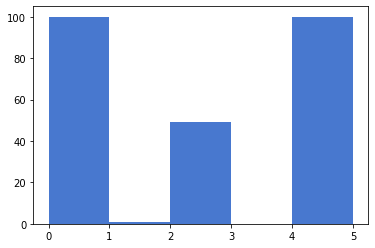

Année # 50


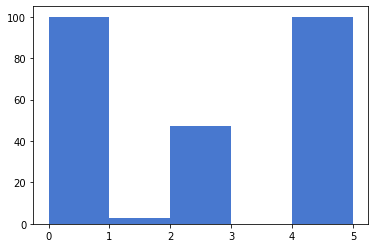

In [4]:
migration(data, 50)

In [21]:
pays, individus, historique_pays, historique_individus = data

In [7]:
#Historique_pays sans valeurs clés
val_list = list(historique_pays.values())

In [8]:
val_list

[[[0.8444218515250481, 0.7579544029403025, 100],
  [0.8444218515250481, 0.7579544029403025, 100],
  [0.8706964257957507, 0.7088654648198949, 100],
  [0.6973061413877804, 0.5902243306195742, 100],
  [0.6973061413877804, 0.5902243306195742, 100],
  [0.6973061413877804, 0.5902243306195742, 100],
  [0.6973061413877804, 0.5902243306195742, 100],
  [0.5770212202665296, 0.55385534216706, 100],
  [0.6397433988738508, 0.5016343617972705, 100],
  [0.6397433988738508, 0.5016343617972705, 100],
  [0.6397433988738508, 0.5016343617972705, 94],
  [0.6397433988738508, 0.5016343617972705, 100],
  [0.6397433988738508, 0.5016343617972705, 50],
  [0.6397433988738508, 0.5016343617972705, 100],
  [0.7074150724504423, 0.5580851668992153, 100],
  [0.7074150724504423, 0.5580851668992153, 100],
  [0.6822230995180901, 0.6265387558561644, 100],
  [0.6822230995180901, 0.6265387558561644, 100],
  [0.6822230995180901, 0.6265387558561644, 100],
  [0.610611393994144, 0.7106921046177558, 100],
  [0.610611393994144, 0.7

Pays # 0


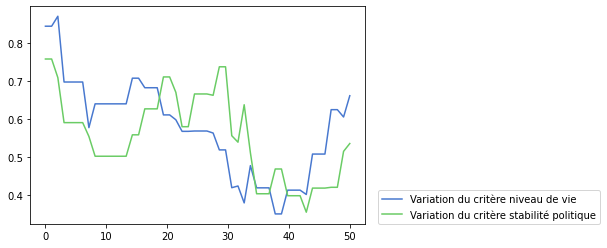

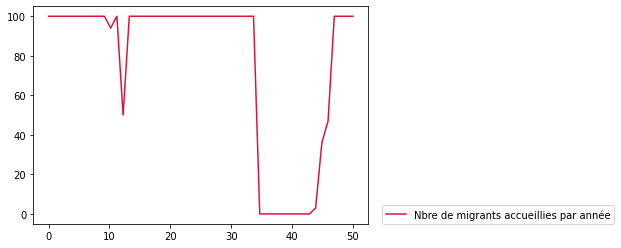

Pays # 1


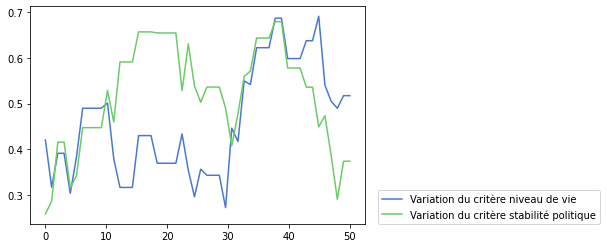

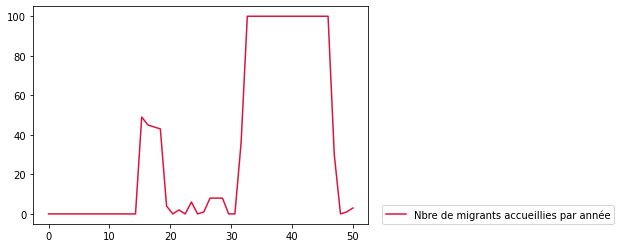

Pays # 2


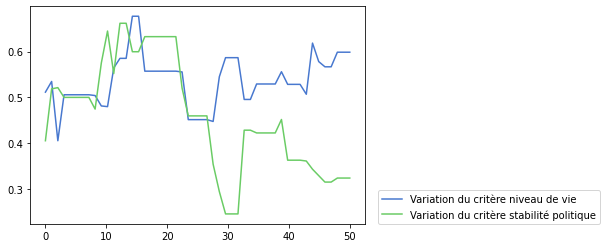

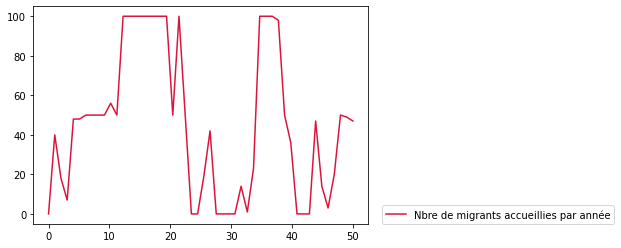

Pays # 3


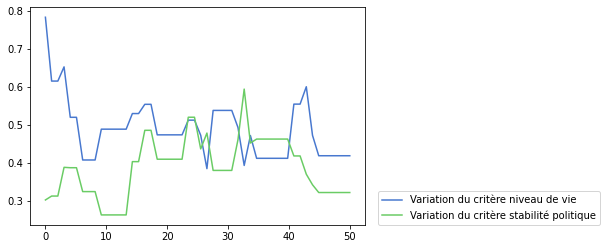

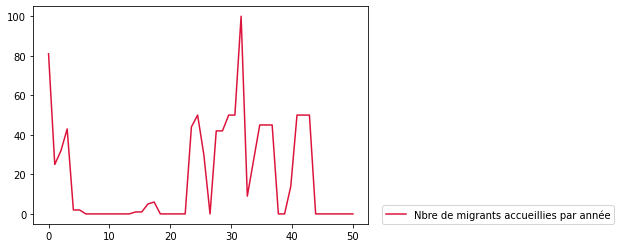

Pays # 4


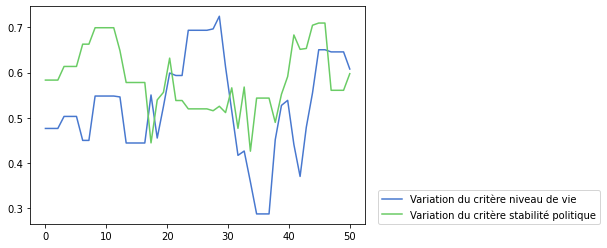

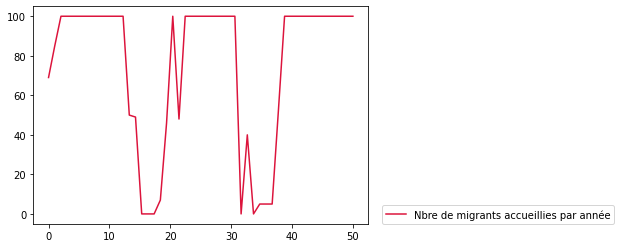

In [24]:

# 3 courbes - Variation du critère niveau de vie, Variation du critère stabilité politique et Nbre de migrants accueillies par année 
# pour chaque annee

k = 0
for countries in val_list:
    nb_migrants = []
    var_nv =  []
    var_sp = []
    for year in countries:
        var_nv.append(year[0])
        var_sp.append(year[1])
        nb_migrants.append(year[2])

    print("Pays #", k)
    x1 = np.linspace(0, 50, 50)
    plt.figure()
    plt.plot(x1, var_nv, label = "Variation du critère niveau de vie")
    plt.plot(x1, var_sp, label = "Variation du critère stabilité politique")
    plt.legend(loc=(1.04,0))
    plt.show()
    
    x2 = np.linspace(0, 50, 50)
    plt.figure()
    plt.plot(x2, nb_migrants,color='crimson', label = "Nbre de migrants accueillies par année")
    plt.legend(loc=(1.04,0))
    plt.show()
    
    k = k + 1
    
    

In [10]:
#Nombre total de personnes qui ont migré vers un pays (nous ne comptons pas les personnes qui sont parties)
mig_tot = []
for countries_ in val_list:
    nb = 0
    for year_ in countries:
        nb = nb + year[2]
    mig_tot.append(nb)

In [11]:
mig_tot

[5000, 5000, 5000, 5000, 5000]

In [26]:
#Historique_individus sans valeurs clés
paths = list(historique_individus.values())

In [32]:
#Déplacements de chacun individu
m = 1
list_of_paths = []
nb_of_travels = []
for person in paths:
    print("Déplacement de la personne #", m)
    edges = []
    for i in range(len(person)-1):
        if person[i]!=person[i+1]:
            print(person[i],"--> ",end = " " )
            edges.append((person[i],person[i+1]))
    list_of_paths.append(edges)
    nb_of_travels.append(len(edges))
    print(person[i+1], end="\n\n\n")
            
    
    m = m+1
        

Déplacement de la personne # 1
0 -->  4 -->  2 -->  0 -->  4 -->  0 -->  4 -->  0 -->  1 -->  4 -->  0


Déplacement de la personne # 2
0 -->  4 -->  2 -->  0 -->  4 -->  0 -->  4 -->  0 -->  4 -->  0 -->  1 -->  4


Déplacement de la personne # 3
0 -->  4 -->  2 -->  0 -->  4 -->  0 -->  4 -->  0 -->  1 -->  4


Déplacement de la personne # 4
0 -->  4 -->  2 -->  0 -->  4 -->  0 -->  4 -->  3 -->  1 -->  4


Déplacement de la personne # 5
0 -->  4 -->  2 -->  0 -->  4 -->  0 -->  4 -->  0 -->  1 -->  4 -->  0


Déplacement de la personne # 6
0 -->  4 -->  2 -->  0 -->  4 -->  0 -->  4 -->  0 -->  4 -->  0 -->  1 -->  4


Déplacement de la personne # 7
0 -->  4 -->  2 -->  0 -->  4 -->  0 -->  4 -->  0 -->  1 -->  4 -->  0


Déplacement de la personne # 8
0 -->  4 -->  2 -->  0 -->  2 -->  0 -->  4 -->  0 -->  4 -->  3 -->  1 -->  4


Déplacement de la personne # 9
0 -->  4 -->  2 -->  0 -->  4 -->  0 -->  4 -->  0 -->  1 -->  4 -->  0


Déplacement de la personne # 10
0 -->  4 -->  2 

In [15]:
max(nb_of_travels)

28

In [16]:
min(nb_of_travels)

8

In [17]:
np.mean(nb_of_travels)

16.236

In [18]:
np.median(nb_of_travels)

17.0